## 第6回課題: トランジット系外惑星のデータ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### データの読み込み

まずは恒星KOI-2に対して、Kepler探査機が取得した光度曲線のデータ koi2.txt をこれまでと同様に読み込んでみよう。

In [2]:
data = pd.read_csv("koi2.txt", comment="#")

In [3]:
data

,time,flux,flux_error
0,352.597548,0.999927,0.000025
1,352.658847,0.999818,0.000025
2,352.679280,0.999912,0.000025
3,352.720146,0.999905,0.000025
4,352.740579,0.999822,0.000025
...,...,...,...
3535,442.300804,0.999664,0.000025
3536,442.321239,0.999760,0.000025
3537,442.341673,0.999770,0.000025
3538,442.362107,0.999811,0.000025


今回のデータは、
- time: 時間（単位は日）
- flux: 恒星の明るさの相対値
- flux_error: 恒星の明るさの測定誤差（今回は使わない）

を含んでいる。

今回は恒星の明るさと時間の関係を知りたいので、timeとfluxを配列として取り出しておく。

In [4]:
x = np.array(data["time"])
y = np.array(data["flux"])

Matplotlibでプロットしてみよう。前回と同様に日本語が使えるようにしておこう。

In [5]:
!pip install japanize_matplotlib
import japanize_matplotlib

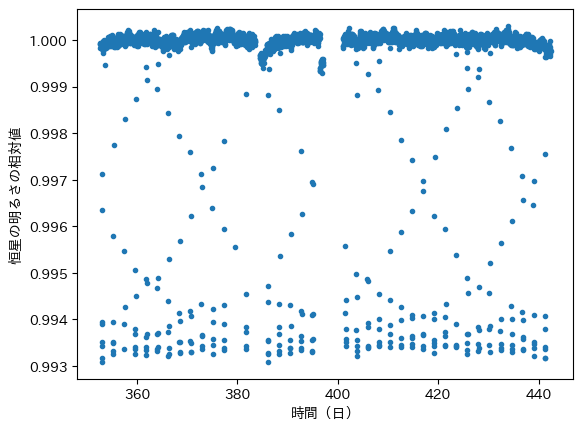

In [6]:
plt.xlabel("時間（日）")
plt.ylabel("恒星の明るさの相対値") # 相対値なので単位は不要
plt.plot(x, y, ".");

### 課題1: 惑星のトランジットによる減光の確認（１）

上のグラフを見ると明らかに明るさが変化しているが、範囲が広すぎて見づらい。一部を拡大してプロットしてみよう。pyplotの関数xlimを使うと、x方向の範囲を指定できる。

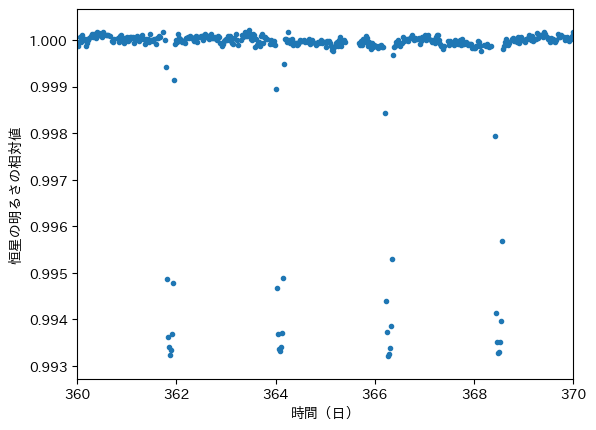

In [7]:
plt.xlim(360, 370) # xの最小値, xの最大値
plt.xlabel("時間（日）")
plt.ylabel("恒星の明るさの相対値") # 相対値なので単位は不要
plt.plot(x, y, ".");

ここでは4回のトランジットが見えている。xlimの範囲を調整してどこか一回分を表示してみよう。

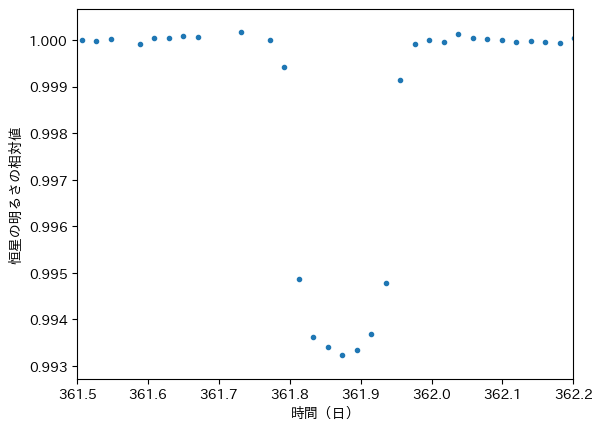

In [8]:
# 上で1回目の周囲を拡大
plt.xlim(361.5, 362.2) 
plt.xlabel("時間（日）")
plt.ylabel("恒星の明るさの相対値") 
plt.plot(x, y, ".");

### 課題2: 惑星のトランジットによる減光の確認（２）

この惑星の公転周期$P$は2.20473547日である（[Masuda 2015](https://iopscience.iop.org/article/10.1088/0004-637X/805/1/28) の値）。[lecture5-1_doppler](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture5_doppler/lecture5-1_doppler.ipynb)の課題1でやったのと同様にして、$y$を縦軸、時間を$P$で割ったあまりt_amariを横軸に取ってプロットし、トランジットによる明るさの減少がこの周期で生じていることを確かめてみよう。軸のラベルも適切に記入すること。

In [9]:
P = 2.20473547 # 公転周期（日）

In [10]:
t_amari = x % P # 時間をPで割ったあまり

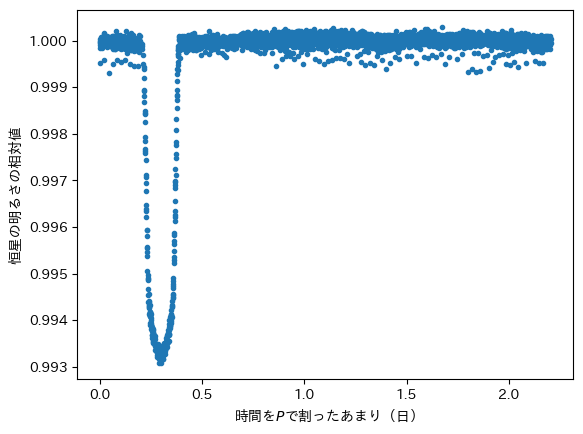

In [11]:
plt.xlabel("時間を$P$で割ったあまり（日）") # ラベル中に数式を使うこともできる。その場合は$$で挟む。
plt.ylabel("恒星の明るさの相対値")
plt.plot(t_amari, y, ".");

トランジットの周辺を拡大したプロットも作ってみよう。

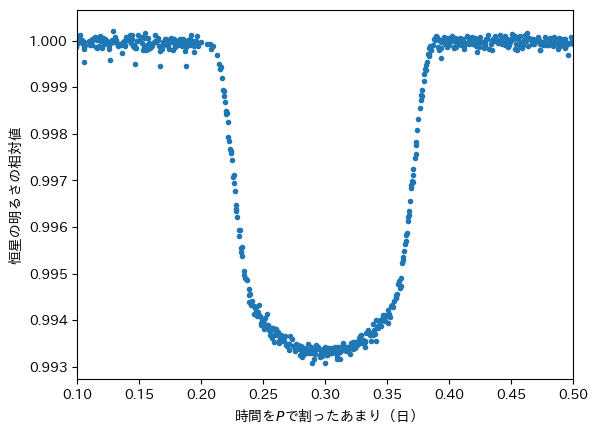

In [12]:
# 再びxlimを使う
plt.xlim(0.1, 0.5)
plt.xlabel("時間を$P$で割ったあまり（日）")
plt.ylabel("恒星の明るさの相対値")
plt.plot(t_amari, y, ".");

### 課題3: 惑星の半径の推定
1. トランジットによる減光の量（トランジットの深さと呼ぶ）は、惑星の半径と恒星の半径の比で決まっている。グラフからトランジットの深さ$\delta$を読み取り（目分量で構わない）、その値から惑星の半径と恒星の半径の比を見積もってみよう。
2. 太陽の半径は $R_\mathrm{sun}=6.957 \times 10^8\,\mathrm{m}$, 木星の半径は $R_\mathrm{jup}=7.149 \times 10^7\,\mathrm{m}$である。木星と太陽の半径の比$R_\mathrm{jup}/R_\mathrm{sun}$はいくらか？
3. この恒星KOI-2の半径は太陽の約2倍である。1,2の値をもとに、この惑星の半径が木星の何倍か計算してみよう。

### 3-1

明るさの相対値の減少量をdeltaとすると、上の図からおおよそ

In [13]:
delta = 1. - 0.9935

In [14]:
delta

0.00649999999999995

これは惑星と恒星の半径の比（radius_ratioとする）の2乗に等しい（lecture-6.pdf p.36など参照）ので

In [15]:
radius_ratio = np.sqrt(delta) # delta**0.5でもよい

In [16]:
radius_ratio

0.0806225774829852

### 3-2

上の数値を用いて計算すると

In [17]:
jupiter_to_sun =  7.149e7 / 6.957e8

In [18]:
jupiter_to_sun

0.10275981026304441

木星の半径はおおよそ太陽の10分の1である。ちなみに地球の半径は木星のさらに10分の1（つまり太陽の100分の1）くらいになっている。

### 3-3

1では惑星と恒星の半径の比$r/R$を計算した。これに$R=2\,R_\mathrm{sun}$をかけると惑星の半径になる。それを$R_\mathrm{Jup}$で割ったものが答えである。よって
$$
    {r \over R_\mathrm{jup}} = {r \over R} \times R \times {1\over R_\mathrm{jup}} = {r \over R} \times 2R_\mathrm{sun} \times {1\over R_\mathrm{jup}} = 2\left(r\over R\right)\left(R_\mathrm{jup}\over R_\mathrm{sun}\right)^{-1}
$$ 
を計算すればよい。答えは

In [19]:
2 * radius_ratio / jupiter_to_sun

1.5691460946961198

ということで、木星よりやや大きな惑星であることがわかった。恒星の近傍を公転する木星型惑星（ホットジュピターと呼ばれる）には一般に半径がやや膨らんだ傾向がある。

### 課題4（余裕があれば）

「明るさ vs 時間を$P$で割ったあまり」の図で、トランジット以外の部分の明るさの変化を拡大して調べてみよう。y方向の範囲は、plt.ylim()で変更できる。

なぜこのような変動が生じるのか理由も考えてみよう。

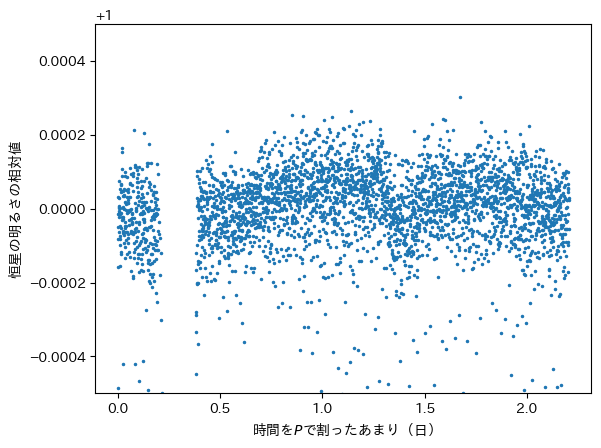

In [20]:
plt.ylim(0.9995, 1.0005)
plt.xlabel("時間を$P$で割ったあまり（日）")
plt.ylabel("恒星の明るさの相対値")
plt.plot(t_amari, y, ".", markersize=3);

$x=1.4$付近にくぼみがあり、そこに近づく/遠ざかるに従って明るさが少し増加しているのが一応は見えると思う。これは恒星ではなく惑星からの光の寄与による（第7回の解説参照）。

### 課題5（余裕があれば）

課題4の変動は拡大してもデータのノイズのためあまり鮮明ではない。ここではビニング（binning）という操作を行い、この変動をより明確に確認できるようにしよう。以下の手順で行う：
1. まず横軸（値0からP）を50個の区間に分ける。bins = np.linspace(0, P, 51) として配列 bins を定義しよう。**区間の数+1個の要素が必要なことに注意。**
2. 50個の各区間内のデータ点に対し、明るさの平均値を計算する。
3. 2で計算した平均値（50個の値からなる配列）を、1で定義した区間の中心に対してプロットする。

2.を行うためには、横軸が各区間に入る$y$のデータを取り出す必要がある。例えば t_amari の値が bins の0番目以上かつ1番目未満になるような y のデータは

In [ ]:
y[(bins[0] < t_amari)&(t_amari < bins[1])]

のようにして取り出せる。これと、[lecture5-1_doppler](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture5_doppler/lecture5-1_doppler.ipynb)の課題3で行ったfor文を用いた操作を組み合わせると2ができる。

### 5-1

まず横軸を50個の区間に分割した配列を用意する。この配列は区間の端点を示すので51個の要素を持つ配列を作る。

In [21]:
bins = np.linspace(0, P, 51)

### 5-2

明るさの平均値の配列を y_mean で定義し、各区間に対して順番に平均値を計算する。[lecture5-1_doppler](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture5_doppler/lecture5-1_doppler.ipynb)の課題3と同様にする。

In [22]:
y_mean = []
for i in range(50):
    y_i = y[(bins[i] < t_amari)&(t_amari < bins[i+1])] # ここで上の方法を使ってiでラベルされるビンに入るデータを取得する
    y_mean.append(np.mean(y_i)) # y_iの平均値を計算し、y_meanに新たな要素として追加する
y_mean = np.array(y_mean)

y_meanの長さが50であることを確認しよう。

In [23]:
len(y_mean)

50

### 5-3

最後に計算したy_meanを50個の区間の中心の値に対してプロットしたい。しかし、binsは区間の端点のため要素は51あり、しかも値は区間の中心からずれている。

そこで、binsの最初の要素を飛ばした50個 bins[1:] と、最後の要素を飛ばした bins[:-1]（これはbins[:51]でも同じ）の平均をとる。

In [24]:
bin_center = 0.5 * (bins[1:] + bins[:-1])

これを横軸、先ほどのy_meanを縦軸にとってデータと共にプロットしてみよう。

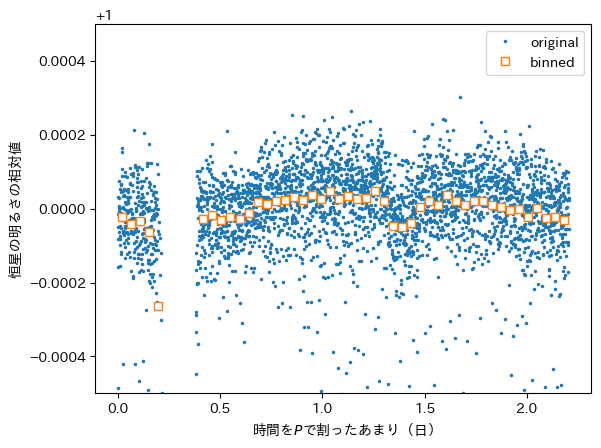

In [25]:
plt.ylim(0.9995, 1.0005)
plt.xlabel("時間を$P$で割ったあまり（日）")
plt.ylabel("恒星の明るさの相対値")
plt.plot(t_amari, y, ".", markersize=3, label='original')
plt.plot(bin_center, y_mean, 's', mfc='white', label='binned') # sは四角いマーカー（square）
plt.legend(loc='best');

平均をとったことでばらつきが抑えられ、傾向が見やすくなった。